In [63]:
import pandas as pd
import pickle

import seaborn as sns

import matplotlib.pyplot as plt
from scikitplot.estimators import plot_learning_curve
import numpy as np

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
import scikitplot as skplt
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate , learning_curve
from sklearn.metrics import confusion_matrix , roc_curve
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
  
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline , make_pipeline
from sklearn.model_selection import GridSearchCV , cross_val_score
from sklearn.preprocessing import MinMaxScaler , StandardScaler
from sklearn.neighbors import KNeighborsClassifier

from sklearn import linear_model
from sklearn.ensemble import BaggingClassifier , AdaBoostClassifier , StackingClassifier , GradientBoostingClassifier
from sklearn.dummy import DummyClassifier
from yellowbrick.classifier import ConfusionMatrix
from imblearn.over_sampling import SMOTE 
import mysql.connector
import pymysql
import sqlite3
import xgboost as xgb
from sklearn.decomposition import PCA


use mysqlworkbench dataset 


In [64]:
data_base = mysql.connector.connect(host="localhost" , user="root" , password="Yugioh11." , database="loan_prediction_file_rouge")
cur = data_base.cursor(buffered=True)
query = "select * from loan_prediction"
cur.execute(query)
tables = cur.fetchone()
#connect sql database to be used has dataframe 


In [65]:
df = pd.read_sql(query , data_base)
df

,MyUnknownColumn,Id,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,NaN,LP000001,1,1,0,1,0,2000,1900.0,700.0,360.0,0.0,0,1
1,1.0,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,2.0,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,3.0,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,4.0,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,609.0,LP002978,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
477,610.0,LP002979,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
478,611.0,LP002983,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
479,612.0,LP002984,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


clean data and make them ready for the model

In [66]:
df = df.drop('Id' , axis=1)

df = df.drop('MyUnknownColumn' , axis=1)

In [67]:
categ = ["Gender" , "Dependents",  "Married" , "Education" , "Self_Employed" , "Property_Area" , "Loan_Status"]
le = LabelEncoder()
df[categ] = df[categ].apply(le.fit_transform)


define X and y axis then split the data

In [68]:

X = df.drop(["Loan_Status" ], axis=1)
# X is the dataframe without the target 

y = df.Loan_Status
#y is the target 

In [69]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
#we are splitting the dataset with train test split a test size of 20 percent of test and 80 percent of train 


the following pipelines will be later called in the different model 

In [83]:
preprocessing_sm = SMOTE(sampling_strategy='auto')
pcas = PCA()

preprocessing_ss = Pipeline(steps=[
    ('standard scaler', StandardScaler())])

model = linear_model.LogisticRegression()

model_xgb = xgb.XGBClassifier()

STANDARD SCALER , PCA , LOGISTIC REGRESSION

In [71]:
pipeline_log = Pipeline(steps = [['preprocessing_Standard_scaler'  , preprocessing_ss],
                                 ['pca' , pcas],
                                ['LogisticRegression', model]
                                     ])

check for the different possible parameters 


In [72]:
pipeline_log.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'preprocessing_Standard_scaler', 'pca', 'LogisticRegression', 'preprocessing_Standard_scaler__memory', 'preprocessing_Standard_scaler__steps', 'preprocessing_Standard_scaler__verbose', 'preprocessing_Standard_scaler__standard scaler', 'preprocessing_Standard_scaler__standard scaler__copy', 'preprocessing_Standard_scaler__standard scaler__with_mean', 'preprocessing_Standard_scaler__standard scaler__with_std', 'pca__copy', 'pca__iterated_power', 'pca__n_components', 'pca__random_state', 'pca__svd_solver', 'pca__tol', 'pca__whiten', 'LogisticRegression__objective', 'LogisticRegression__use_label_encoder', 'LogisticRegression__base_score', 'LogisticRegression__booster', 'LogisticRegression__callbacks', 'LogisticRegression__colsample_bylevel', 'LogisticRegression__colsample_bynode', 'LogisticRegression__colsample_bytree', 'LogisticRegression__early_stopping_rounds', 'LogisticRegression__enable_categorical', 'LogisticRegression__eval_metric', 'Logisti

Fit the model to start the training

In [73]:
pipeline_log.fit(X_train , y_train.values)

Pipeline(steps=[('preprocessing_Standard_scaler',
                 Pipeline(steps=[('standard scaler', StandardScaler())])),
                ('pca', PCA()),
                ['LogisticRegression',
                 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               gamma=0, gpu_id=-1, grow_policy='depthwise',
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.300000012, max_bin=256,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=6, max_leaves=0, min_child_weight=1,
                               missing=nan, monotone_constraints='()',
                               n_estimators=100, n

let's check the result 

In [74]:
print("accuracy train : %.3f"%pipeline_log.score(X_train , y_train))
print("accuracy test : %.3f"%pipeline_log.score(X_test , y_test))

accuracy train : 1.000
accuracy test : 0.763


In [75]:
y_pred_log = pipeline_log.predict(X_test)
y_pred_log

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1])

In [76]:
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.70      0.50      0.58        32
           1       0.78      0.89      0.83        65

    accuracy                           0.76        97
   macro avg       0.74      0.70      0.71        97
weighted avg       0.75      0.76      0.75        97



<AxesSubplot:title={'center':'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

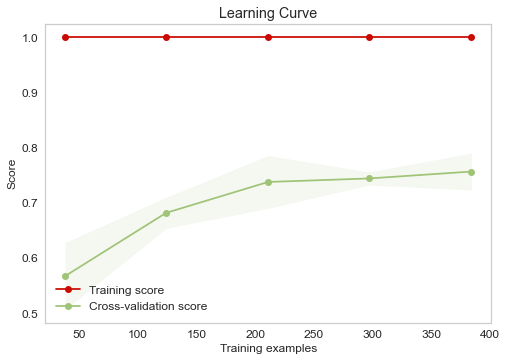

In [77]:
plot_learning_curve(pipeline_log, X , y)

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

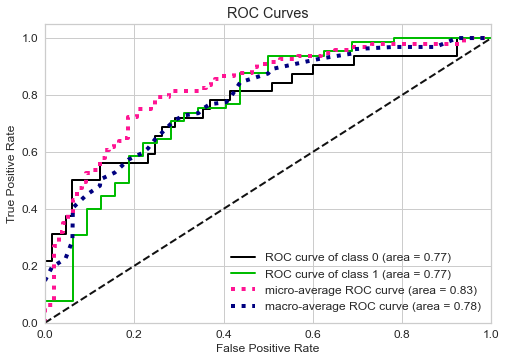

In [78]:
pipeline_log.fit(X_train, y_train)
y_probas = pipeline_log.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas)

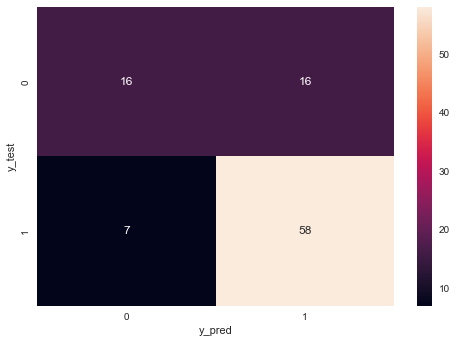

In [79]:
cm = confusion_matrix(y_test, y_pred_log)
sns.heatmap(cm, annot=True, fmt=".0f")
plt.xlabel('y_pred')
plt.ylabel('y_test') 
plt.show()

STANDARD SCALER , SMOTE , LOGISTIC REGRESSION

In [80]:
pipeline_log_sm = imbpipeline(steps = [['smote'  , preprocessing_sm],
                                
                                ['LogisticRegression', model]
                                     ])

accuracy train : 1.000
accuracy test : 0.742
              precision    recall  f1-score   support

           0       0.64      0.50      0.56        32
           1       0.78      0.86      0.82        65

    accuracy                           0.74        97
   macro avg       0.71      0.68      0.69        97
weighted avg       0.73      0.74      0.73        97



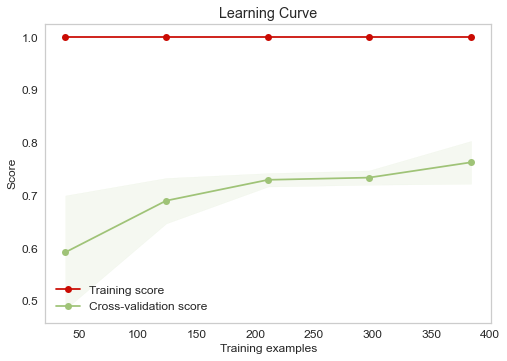

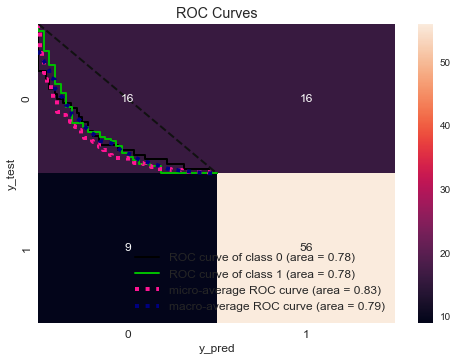

In [81]:
pipeline_log_sm.get_params().keys()
pipeline_log_sm.fit(X_train , y_train.values)

print("accuracy train : %.3f"%pipeline_log_sm.score(X_train , y_train))
print("accuracy test : %.3f"%pipeline_log_sm.score(X_test , y_test))

y_pred_sm = pipeline_log_sm.predict(X_test)
y_pred_sm

print(classification_report(y_test, y_pred_sm))

plot_learning_curve(pipeline_log_sm, X , y)

y_probas = pipeline_log_sm.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas)

cm = confusion_matrix(y_test, y_pred_sm)
sns.heatmap(cm, annot=True, fmt=".0f")
plt.xlabel('y_pred')
plt.ylabel('y_test') 
plt.show()

In [84]:
pipeline_xgb = imbpipeline(steps = [['smote'  , preprocessing_sm],
                                
                                ['LogisticRegression', model_xgb]
                                     ])

In [ ]:
pipeline_xgb.get_params().keys()


In [ ]:
pipeline_xgb.fit(X_train , y_train.values)

In [ ]:
print("accuracy train : %.3f"%pipeline_xgb.score(X_train , y_train))
print("accuracy test : %.3f"%pipeline_xgb.score(X_test , y_test))



In [ ]:
y_pred_xgb = pipeline_log.predict(X_test)
y_pred_xgb

In [ ]:
print(classification_report(y_test, y_pred_xgb))


In [ ]:

plot_learning_curve(pipeline_xgb, X , y)

In [ ]:

y_probas = pipeline_xgb.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas)

In [ ]:
cm = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm, annot=True, fmt=".0f")
plt.xlabel('y_pred')
plt.ylabel('y_test') 
plt.show()